In [20]:
from pathlib import Path
import glob

import numpy as np
import matplotlib.pyplot as plt
from pymeasure.experiment import Results, Parameter

from lib import config
from Scripts.IVg import IVg
from Scripts.It import It

In [22]:
# Read all csv files in the data folder and subfolders
DataDir = Path(config['Filename']['directory'])
DataDir = Path(r'N:\\Otros ordenadores\\LabComputer1\\data')
IVg_files = glob.glob(str(DataDir/'**'/'IVg*.csv'), recursive=True)
It_files = glob.glob(str(DataDir/'**'/'It*.csv'), recursive=True)
IVg_results = [Results.load(path, procedure_class=IVg) for path in IVg_files]
It_results = [Results.load(path, procedure_class=It) for path in It_files]

In [23]:
def filter_by_param(results: list[Results], param: str, value):
    """Filter results by a parameter and value.
    """
    return [r for r in results if r.parameters[param].value == value]

def filter_by(results: list[Results], func: callable):
    """Filter results by a function.
    """
    return [r for r in results if func(r)]

def plot(result: Results, **kwargs):
    """Plot the results of a single IVg measurement.
    """
    fig, ax = plt.subplots()
    result.data.plot(x='Vg (V)', y='I (A)', ax=ax, **kwargs)
    ax.set_title(result.procedure.__class__.__name__)
    ax.set_xlabel('Vg (V)')
    ax.set_ylabel('I (A)')
    #ax.legend()
    return fig, ax

In [14]:
filter_by_param(IVg_results, 'vds', 0.075)[0]._data.shape

(1501, 2)

{'Irange': <FloatParameter(name=Irange,value=0.001,units=A,default=0.001)>,
 'N_avg': <IntegerParameter(name=N_avg,value=2,units=None,default=2)>,
 'chip': <Parameter(name=Chip,value=Miguel 9,default=None)>,
 'info': <Parameter(name=Information,value=None,default=None)>,
 'sample': <Parameter(name=Sample,value=J,default=None)>,
 'step_time': <FloatParameter(name=Step time,value=0.01,units=s,default=0.01)>,
 'vds': <FloatParameter(name=VDS,value=0.075,units=V,default=0.075)>,
 'vg_end': <FloatParameter(name=VG end,value=35.0,units=V,default=35.0)>,
 'vg_start': <FloatParameter(name=VG start,value=-35.0,units=V,default=-35.0)>,
 'vg_step': <FloatParameter(name=VG step,value=1.0,units=V,default=0.2)>}

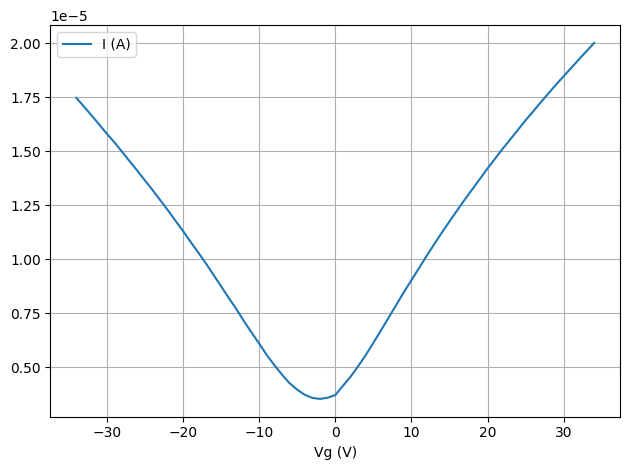

In [55]:
# select main part of the IVg measurement
res = IVg_results[-1]
Vg_ = res.data[:len(res.data)//2]
Vg_[np.diff(Vg_['Vg (V)'], prepend=0.) > 0].plot(x='Vg (V)', y='I (A)')
res.parameters

{'Irange': <FloatParameter(name=Irange,value=0.0001,units=A,default=0.001)>,
 'N_avg': <IntegerParameter(name=N_avg,value=2,units=None,default=2)>,
 'chip': <Parameter(name=Chip,value=Chip 2 ALD Caja NO ALD + CLEANED CHIPS,default=None)>,
 'info': <Parameter(name=Information,value=565 nm,default=None)>,
 'laser_T': <FloatParameter(name=Laser ON+OFF period,value=360.0,units=s,default=360.0)>,
 'laser_freq': <FloatParameter(name=Laser frequency,value=0.0,units=Hz,default=0.0)>,
 'laser_v': <FloatParameter(name=Laser voltage,value=3.0,units=V,default=0.0)>,
 'sample': <Parameter(name=Sample,value=E,default=None)>,
 'sampling_t': <FloatParameter(name=Sampling time,value=0.1,units=s,default=0.1)>,
 'vds': <FloatParameter(name=VDS,value=0.075,units=V,default=0.075)>,
 'vg': <FloatParameter(name=VG,value=0.0,units=V,default=0.0)>}

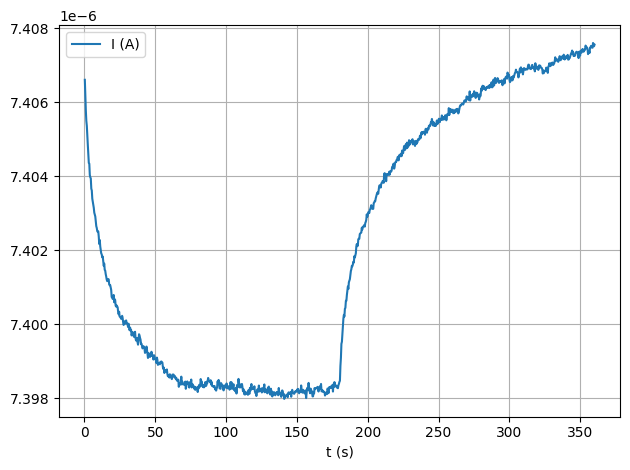

In [54]:
# Some It measurement
res2 = It_results[-5]
It_ = res2.data
It_.plot(x='t (s)', y='I (A)')
res2.parameters